In [33]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [34]:
%matplotlib inline
import pylab as pl
import PIL.Image as Image
import cv2    

In [61]:
#load image
image_original = cv2.imread('./difficult_table_parse_images/21.PNG')
#Show Images

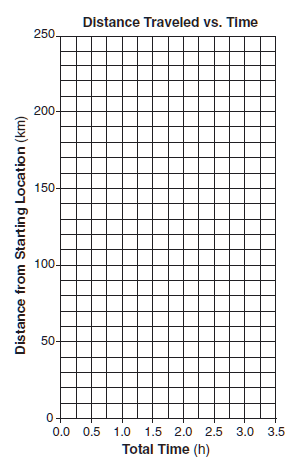

In [62]:
Image.fromarray(image_original)

In [63]:
#gray image
image_gray = cv2.cvtColor(image_original,cv2.COLOR_BGR2GRAY)
#adaptive threshold
thresh = cv2.adaptiveThreshold(image_gray,255,1,1,11,15)

#show image
# Image.fromarray(thresh)

In [64]:
#find the countours 
mod_image, contours0,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#size of the image (height, width)
h, w = image_original.shape[:2]

#copy the original image to show the posible candidate
image_candidates = image_original.copy()

#biggest rectangle
size_rectangle_max = 0; 
for i in range(len(contours0)):
    #aproximate countours to polygons
    approximation = cv2.approxPolyDP(contours0[i], 4, True)
        
    #has the polygon 4 sides?
    if(not (len (approximation)==4)):
        continue;
    #is the polygon convex ?
    if(not cv2.isContourConvex(approximation) ):
        continue; 
    #area of the polygon
    size_rectangle = cv2.contourArea(approximation)
    #store the biggest
    if size_rectangle> size_rectangle_max:
        size_rectangle_max = size_rectangle 
        big_rectangle = approximation

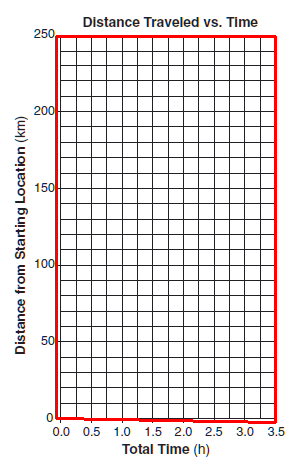

In [65]:
#show the best candidate
approximation = big_rectangle
for i in range(len(approximation)):
    cv2.line(image_candidates,
             (big_rectangle[(i%4)][0][0], big_rectangle[(i%4)][0][1]), 
             (big_rectangle[((i+1)%4)][0][0], big_rectangle[((i+1)%4)][0][1]),
             (255, 0, 0), 2)
#show image
Image.fromarray(image_candidates)